Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import datetime as dt

In [3]:
import warnings;warnings.simplefilter('ignore')

Reading dataset

In [4]:
df=pd.read_csv("C:\\Users\\Abhi\\NYC Taxi Trip Problem\\nyc_taxi_trip_duration.csv")

Taking a brief look at the data 

In [5]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100


In [6]:
df.shape

(729322, 11)

In [7]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [8]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [9]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [10]:
df.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

In [11]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


Feature creation

In [12]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['drop_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [13]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['drop_day']=df['drop_datetime'].dt.day_name()

In [14]:
df['pickup_day_no']=df['pickup_datetime'].dt.weekday
df['drop_day_no']=df['drop_datetime'].dt.weekday

In [15]:
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['drop_hour']=df['drop_datetime'].dt.hour

In [16]:
df['pickup_month']=df['pickup_datetime'].dt.month
df['drop_month']=df['drop_datetime'].dt.month

Constructing function to apply on data

In [17]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late Night'

In [18]:
df['pickup_time']=df['pickup_hour'].apply(time_of_day)
df['drop_time']=df['drop_hour'].apply(time_of_day)

In [19]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [20]:
from geopy.distance import great_circle

In [21]:
def cal_dist(pickup_lat,pickup_long,drop_lat,drop_long):
    start_coordinates=(pickup_lat,pickup_long)
    stop_coordinates=(drop_lat,drop_long)
    
    return great_circle(start_coordinates,stop_coordinates).km

In [22]:
df['total_dist']=df.apply(lambda x: cal_dist(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)


Univariate Analysis

<AxesSubplot:xlabel='trip_duration', ylabel='Count'>

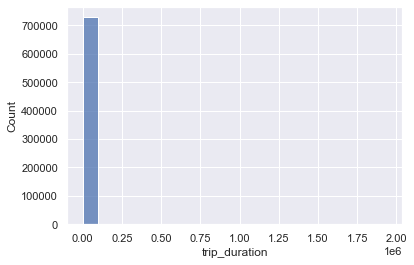

In [23]:
sns.histplot(df['trip_duration'],kde=False,bins=20)

<AxesSubplot:xlabel='trip_duration'>

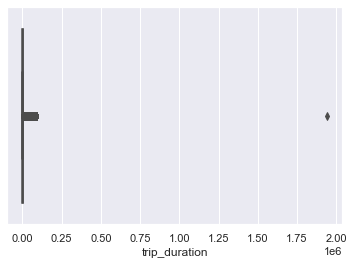

In [24]:
sns.boxplot(df['trip_duration'])

In [25]:
df['trip_duration'].sort_values(ascending=False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
312992          1
398887          1
622664          1
323299          1
296874          1
Name: trip_duration, Length: 729322, dtype: int64

In [26]:
df.drop(df[df['trip_duration']==1939736].index, inplace = True)

<AxesSubplot:xlabel='vendor_id', ylabel='count'>

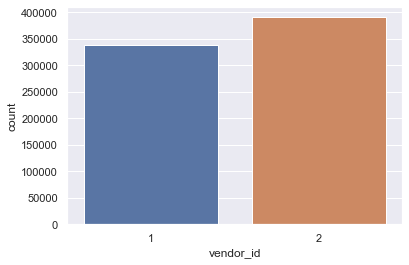

In [27]:
sns.countplot(x='vendor_id',data=df)

In [28]:
df.passenger_count.value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
9         1
7         1
Name: passenger_count, dtype: int64

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

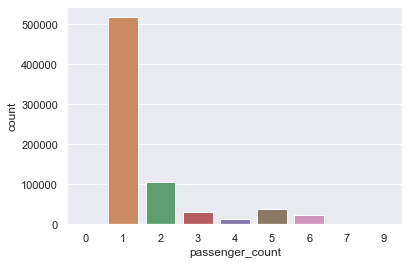

In [29]:
sns.countplot(x='passenger_count',data=df)

In [30]:
df=df[df['passenger_count']!=0]
df=df[df['passenger_count']<=6]

In [31]:
df.passenger_count.value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

In [32]:
df['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994463
Y    0.005537
Name: store_and_fwd_flag, dtype: float64

In [33]:
df['total_dist'].value_counts()

0.000000     2893
0.000424       21
0.000424       19
0.000424       18
0.001273       13
             ... 
0.626853        1
2.298744        1
11.986954       1
1.458075        1
0.566500        1
Name: total_dist, Length: 726216, dtype: int64

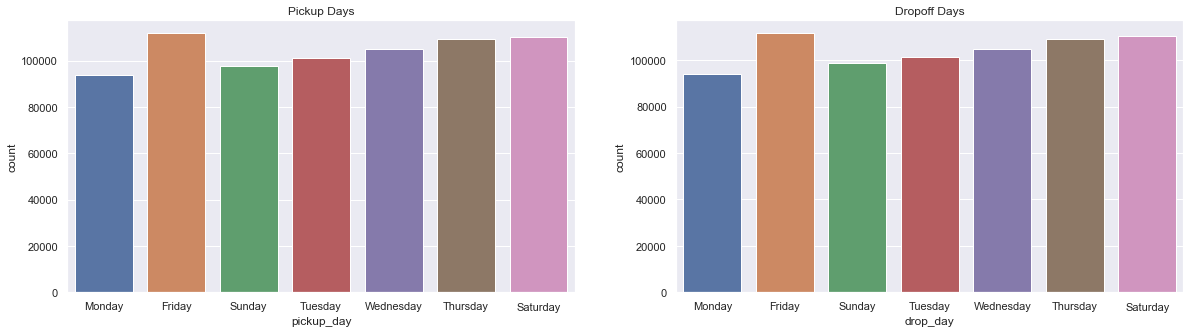

In [34]:
#TRIPS PER DAY
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x='pickup_day',data=df,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x='drop_day',data=df,ax=ax2)

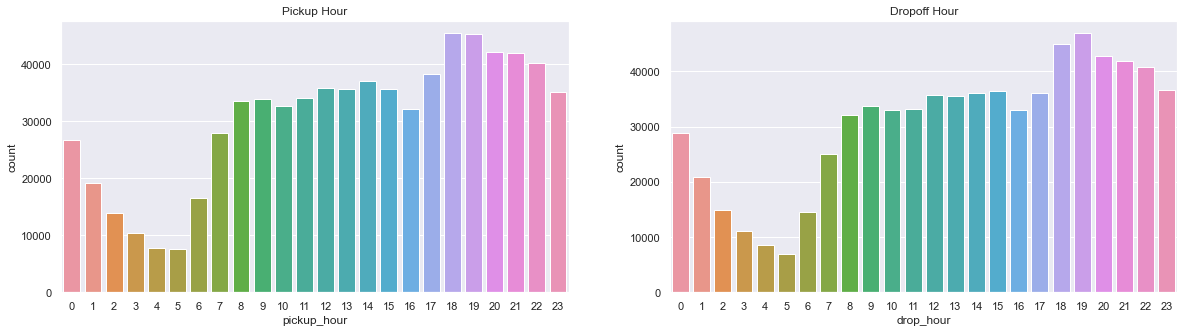

In [35]:
#TRIPS PER HOUR
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title("Pickup Hour")
ax=sns.countplot(x='pickup_hour',data=df,ax=ax3)
ax4.set_title("Dropoff Hour")
ax=sns.countplot(x='drop_hour',data=df,ax=ax4)

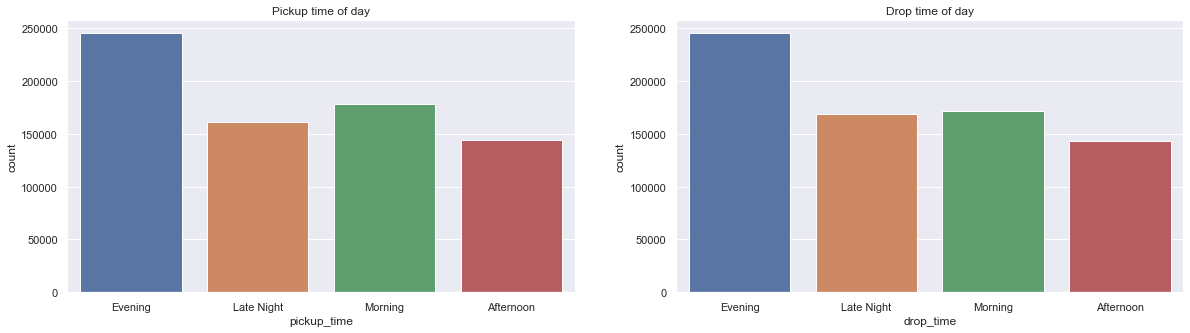

In [36]:
#TRIPS PER TIME OF THE DAY
figure,(ax5,ax6)=plt.subplots(ncols=2,figsize=(20,5))
ax5.set_title("Pickup time of day")
ax=sns.countplot(x='pickup_time',data=df,ax=ax5)
ax6.set_title("Drop time of day")
ax=sns.countplot(x='drop_time',data=df,ax=ax6)

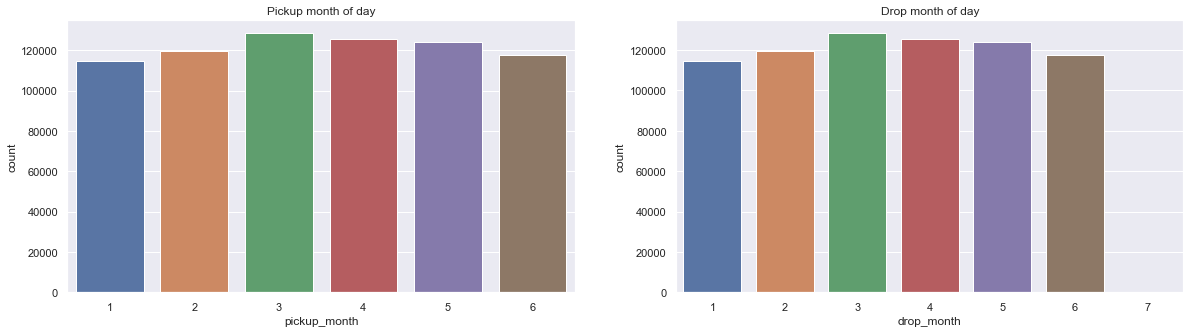

In [37]:
#TRIPS PER MONTH
figure,(ax7,ax8)=plt.subplots(ncols=2,figsize=(20,5))
ax7.set_title("Pickup month of day")
ax=sns.countplot(x='pickup_month',data=df,ax=ax7)
ax8.set_title("Drop month of day")
ax=sns.countplot(x='drop_month',data=df,ax=ax8)

In [38]:
#BIVARIATE ANALYSIS


<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

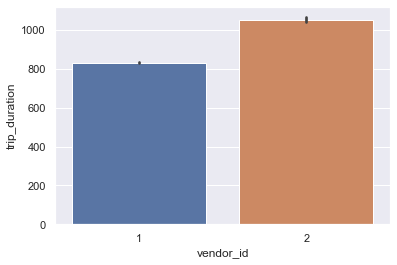

In [39]:
#TRIP DURATION PER VENDOR
sns.barplot(y='trip_duration',x='vendor_id',data=df,estimator=np.mean)

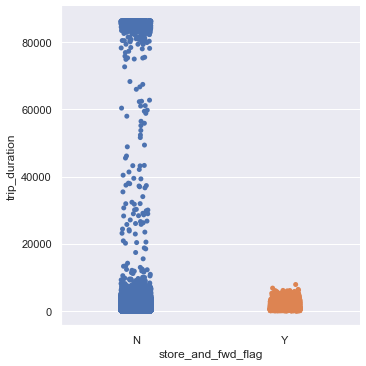

In [40]:
#TRIP DURATIONS PER STORE AND FORWARD FLAG
sns.catplot(y='trip_duration',x="store_and_fwd_flag",data=df,kind='strip')

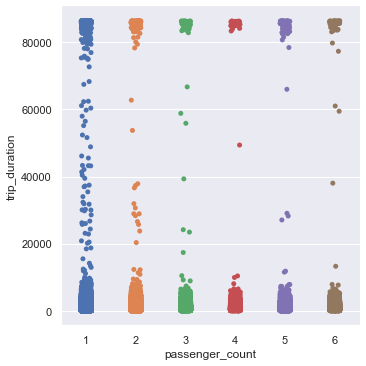

In [41]:
#TRIP DURATION PER PASSENGER COUNT
sns.catplot(y="trip_duration",x='passenger_count',data=df,kind='strip')

<AxesSubplot:xlabel='pickup_day', ylabel='trip_duration'>

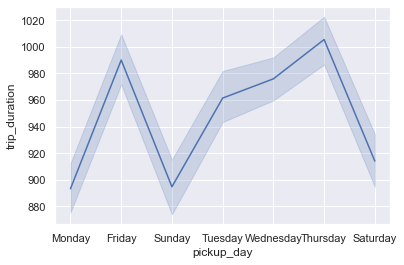

In [42]:
#TRIP DURATION PER MONTH
sns.lineplot(y='trip_duration',x='pickup_day',data=df)

<AxesSubplot:xlabel='pickup_time', ylabel='trip_duration'>

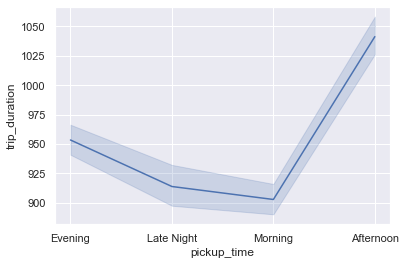

In [43]:
#TRIP DURATIONS PER PICKUP TIME OF THE DAY
sns.lineplot(y='trip_duration',x='pickup_time',data=df)

<AxesSubplot:xlabel='pickup_day_no', ylabel='trip_duration'>

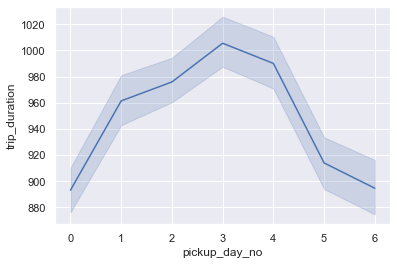

In [44]:
#TRIP DURATIONS PER DAY OF THE WEEK
sns.lineplot(y='trip_duration',x='pickup_day_no',data=df)

Bivariate Analysis

<AxesSubplot:xlabel='vendor_id', ylabel='total_dist'>

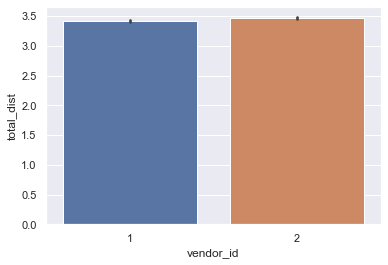

In [45]:
#RELATINSHIP BETWEEN VENDOR AND TOTAL DISTANCE COVERED
sns.barplot(y='total_dist',x='vendor_id',data=df,estimator=np.mean)

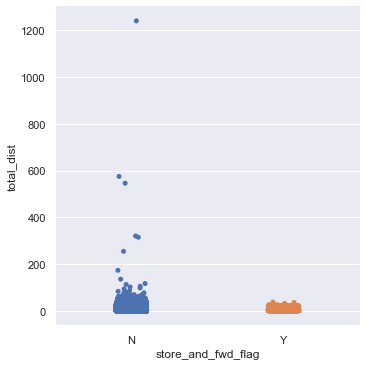

In [46]:
#RELATIONSHIP BETWEEN DISTANCE AND STORE AND FORWARD FLAG
sns.catplot(y='total_dist',x='store_and_fwd_flag',data=df,kind='strip')

<AxesSubplot:xlabel='pickup_day_no', ylabel='total_dist'>

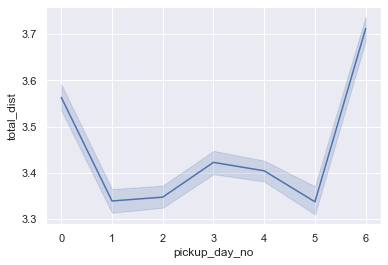

In [47]:
#DISTANCE PER DAY OF WEEK
sns.lineplot(y='total_dist',x='pickup_day_no',data=df)

<AxesSubplot:xlabel='pickup_hour', ylabel='total_dist'>

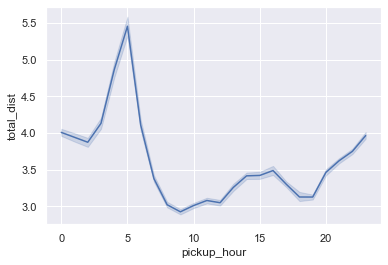

In [48]:
#DISTANCE PER HOUR OF DAY
sns.lineplot(y='total_dist',x='pickup_hour',data=df)

<AxesSubplot:xlabel='pickup_time', ylabel='total_dist'>

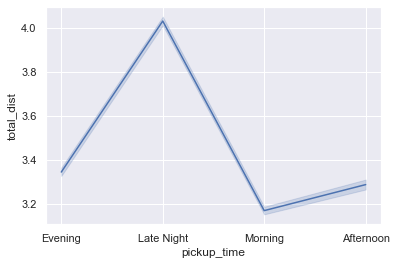

In [49]:
#DISTANCE PER TIME OF DAY 
sns.lineplot(y='total_dist',x='pickup_time',data=df)

<AxesSubplot:xlabel='pickup_month', ylabel='total_dist'>

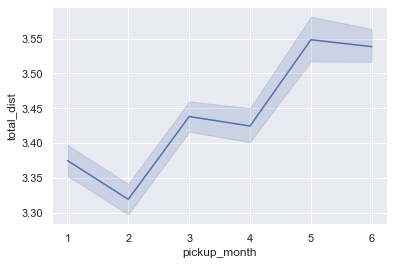

In [50]:
#DISTANCE PER MONTH
sns.lineplot(y='total_dist',x='pickup_month',data=df)

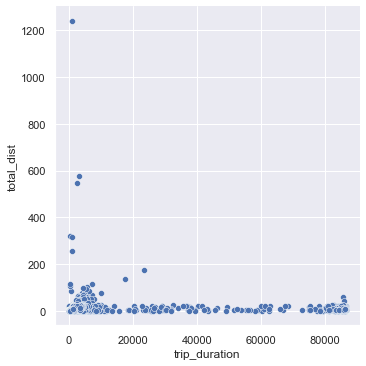

In [51]:
#RELATIONSHIP BETWEEN TRIP DURATION AND DISTANCE 
sns.relplot(y='total_dist',x='trip_duration',data=df)

In [52]:
#LARGEST AND SMALLEST TRIP DURATIONS
print('The value of 5 largest trip duration values are as follows: \n {} '.format(df['trip_duration'].nlargest(5)))

The value of 5 largest trip duration values are as follows: 
 259437    86391
119185    86387
177225    86378
496391    86377
90557     86369
Name: trip_duration, dtype: int64 


In [53]:
df=df[df.trip_duration!=df.trip_duration.max()]
df=df[df.trip_duration!=df.trip_duration.min()]

In [54]:
df['trip_duration_hour']=df['trip_duration']/3600

In [55]:
df.passenger_count.value_counts()

1    517402
2    105096
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

In [56]:
df=df[df.passenger_count<=6]
df=df[df.passenger_count!=0]

In [57]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['drop_day']=df['drop_datetime'].dt.day_name()
df['pickup_month']=df['pickup_datetime'].dt.month
df['drop_month']=df['drop_datetime'].dt.month

In [58]:
df.pickup_month.value_counts()

3    128307
4    125627
5    124193
2    119354
6    117404
1    114388
Name: pickup_month, dtype: int64

In [59]:
df.drop_month.value_counts()

3    128275
4    125626
5    124229
2    119351
6    117377
1    114362
7        53
Name: drop_month, dtype: int64

In [60]:
from math import radians,cos,sin,asin,sqrt

def haversine(df):
    lat1,lon1,lat2,lon2=df.pickup_latitude,df.pickup_longitude,df.dropoff_latitude,df.dropoff_longitude
    R = 3959.87433
    dLat=radians(lat2-lat1)
    dLon=radians(lon2-lon1)
    lat1=radians(lat1)
    lat2=radians(lat2)
    
    a=sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c=2*asin(sqrt(a))
    
    return R*c

In [61]:
df['Distance']=df.apply(lambda x : haversine(x), axis=1)

<AxesSubplot:xlabel='Distance', ylabel='trip_duration'>

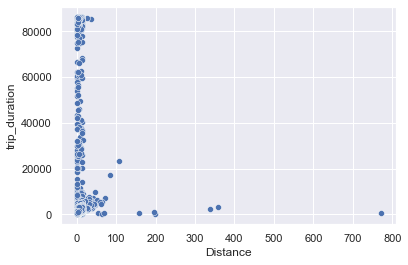

In [62]:
sns.scatterplot(x='Distance',y='trip_duration',data=df)

In [63]:
print('The number of rows with distance 0 kms: {} '.format(len(df[df.Distance==0])))

The number of rows with distance 0 kms: 2889 


In [64]:
mean_dist=df['Distance'].mean()
df.loc[df['Distance']==0,'Distance']=mean_dist

<AxesSubplot:xlabel='speed'>

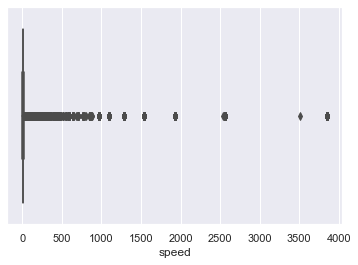

In [65]:
df['speed']=df['Distance']/df['trip_duration_hour']
sns.boxplot(df['speed'])

<AxesSubplot:xlabel='Distance', ylabel='trip_duration'>

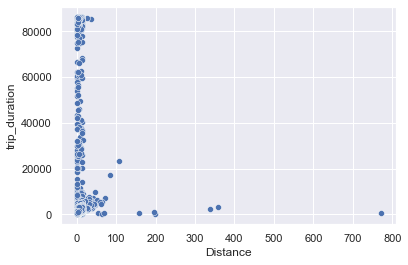

In [66]:
sns.scatterplot(x='Distance',y='trip_duration',data=df)

<AxesSubplot:xlabel='log_distance', ylabel='log_trip_duration'>

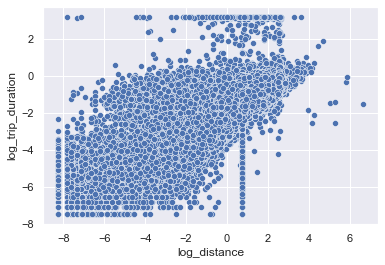

In [67]:
df['log_distance']=np.log(df.Distance)
df['log_trip_duration']=np.log(df.trip_duration_hour)
sns.scatterplot(x='log_distance',y='log_trip_duration',data=df)

In [120]:
df=df[df.log_trip_duration<=2]

In [121]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'drop_datetime', 'pickup_day', 'drop_day',
       'pickup_day_no', 'drop_day_no', 'pickup_hour', 'drop_hour',
       'pickup_month', 'drop_month', 'pickup_time', 'drop_time', 'total_dist',
       'trip_duration_hour', 'Distance', 'speed', 'log_distance',
       'log_trip_duration'],
      dtype='object')

In [124]:
df2=df.loc[:,['passenger_count','store_and_fwd_flag','trip_duration', 'pickup_day', 'drop_day', 'pickup_month','drop_month','pickup_time','drop_time','speed','log_distance','Distance']]

In [127]:
df2=pd.get_dummies(df2,columns=['store_and_fwd_flag','pickup_day','drop_day','pickup_month','drop_month','pickup_time', 'drop_time'])

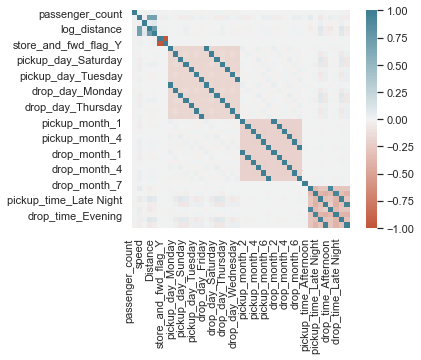

In [129]:
corr=df2.corr()
ax=sns.heatmap(corr,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='right');

In [130]:
base_line_col=['Distance']

In [163]:
predictor_cols=['passenger_count','Distance','store_and_fwd_flag_N','store_and_fwd_flag_Y',
               'pickup_day_Friday','pickup_day_Monday','pickup_day_Saturday','pickup_day_Sunday',
               'pickup_day_Thursday','pickup_day_Tuesday','pickup_day_Wednesday','drop_day_Friday',
               'drop_day_Monday','drop_day_Saturday','drop_day_Sunday','drop_day_Thursday',
               'drop_day_Tuesday','drop_day_Wednesday','pickup_month_1','pickup_month_5','pickup_month_6',
               'drop_month_1','drop_month_5','drop_month_6','pickup_time_Late Night',
               'pickup_time_Afternoon','pickup_time_Morning','drop_time_Evening',
               'drop_time_Late Night','drop_time_Afternoon','drop_time_Morning']
predictor_cols

['passenger_count',
 'Distance',
 'store_and_fwd_flag_N',
 'store_and_fwd_flag_Y',
 'pickup_day_Friday',
 'pickup_day_Monday',
 'pickup_day_Saturday',
 'pickup_day_Sunday',
 'pickup_day_Thursday',
 'pickup_day_Tuesday',
 'pickup_day_Wednesday',
 'drop_day_Friday',
 'drop_day_Monday',
 'drop_day_Saturday',
 'drop_day_Sunday',
 'drop_day_Thursday',
 'drop_day_Tuesday',
 'drop_day_Wednesday',
 'pickup_month_1',
 'pickup_month_5',
 'pickup_month_6',
 'drop_month_1',
 'drop_month_5',
 'drop_month_6',
 'pickup_time_Late Night',
 'pickup_time_Afternoon',
 'pickup_time_Morning',
 'drop_time_Evening',
 'drop_time_Late Night',
 'drop_time_Afternoon',
 'drop_time_Morning']

In [164]:
target_col=['trip_duration']

In [165]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
def modelfit(estimator,data_train,data_test,predictors,target):
    #print(data_train.head())
    #fitting model
    estimator.fit(data_train[predictors],data_train.loc[:,target])
    #train data prediction
    train_pred=estimator.predict(data_train[predictors])
    #cross_validation score
    cv_score=cross_val_score(estimator,data_train[predictors],data_train.loc[:,target],cv=20,scoring='neg_mean_squared_error')
    
    cv_score=np.sqrt(np.abs(cv_score))
    #Print model report:
    print ("\nModel Report")
    print ("RMSE on Train Data: %.4g" % np.sqrt(metrics.mean_squared_error(data_train.loc[:,target].values, train_pred)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    test_pred=estimator.predict(data_test[predictors])
    print ("RMSE on Test Data: %.4g" % np.sqrt(metrics.mean_squared_error(data_test.loc[:,target].values, test_pred)))
    
    return test_pred

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
calidation_size=0.20
seed=7
X_train,X_test=train_test_split(df2,test_size=0.2,random_state=seed)

In [179]:
mean_pred=np.repeat(X_train[target_col].mean(),len(X_test[target_col]))
from sklearn.metrics import mean_squared_error as mae
sqrt(mae(X_test[target_col],mean_pred))

664.1583834380903

In [180]:
alg1 = LinearRegression(normalize=True)
print('The baseline model')
y_pred=modelfit(alg1, X_train, X_test,base_line_col,target)
coef1 = alg1.coef_
print('The coeffient is {}'.format(coef1))

The baseline model

Model Report
RMSE on Train Data: 463
CV Score : Mean - 461.4 | Std - 47.83 | Min - 420.1 | Max - 592.6
RMSE on Test Data: 577.6
The coeffient is [[187.7810396]]



Model Report
RMSE on Train Data: 448.1
CV Score : Mean - 446.4 | Std - 49.67 | Min - 404.3 | Max - 582.4
RMSE on Test Data: 567.4


<AxesSubplot:title={'center':'Model Coefficients'}>

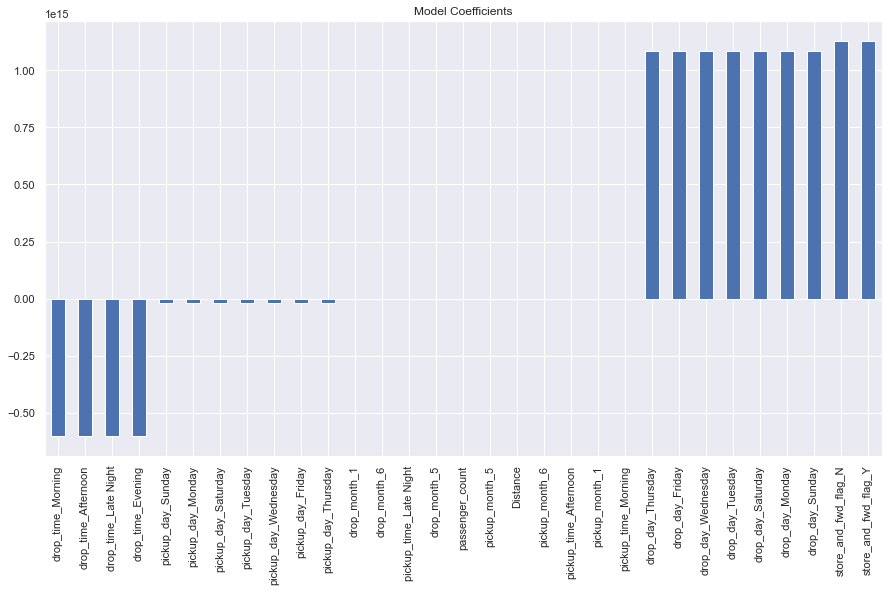

In [181]:
#BUILDING A REGRESSION MODEL
alg2 = LinearRegression(normalize=True)
y_pred=modelfit(alg2, X_train, X_test, predictor_cols,target_col)
coef1 = pd.Series(alg2.coef_[0], predictor_cols).sort_values()
coef1.plot(kind='bar', title='Model Coefficients',figsize=(15,8))